# Startup

## Import libs

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Carregar arquivo

In [51]:
df = pd.read_csv('assets/precos_carros_brasil.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46448\4038775297.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('assets/precos_carros_brasil.csv')


## Verfica se há valores faltantes no arquivo, se sim irá preencher com 'indefinido' e depois remover linhas que fipe_code e model são iguais a 'indefinido'

In [52]:
if df.isnull().any().any():
    df.fillna('indefinido', inplace=True)
    df = df[(df['fipe_code'] != 'indefinido') & (df['model'] != 'indefinido')]
    print('Valores nulos encontrados e substituídos por "indefinido", e removidos linhas que fipe_code e model são "indefinido"')
else:
    print('Não há valores nulos')

Valores nulos encontrados e substituídos por "indefinido", e removidos linhas que fipe_code e model são "indefinido"


## Verifica se há dados duplicados

In [53]:
duplicated_rows = df.duplicated()
if duplicated_rows.any():
    print("Há dados duplicados.")
else:
    print("Não há dados duplicados.")

Há dados duplicados.


## Converter as colunas year_of_reference, year_model e avg_price_brl para numericos

In [54]:
df['year_of_reference'] = pd.to_numeric(df['year_of_reference'], errors='coerce')
df['year_model'] = pd.to_numeric(df['year_model'], errors='coerce')
df['avg_price_brl'] = pd.to_numeric(df['avg_price_brl'], errors='coerce')

## Criar duas categorias para separação entre colunas numéricas e categóricas

In [55]:
categorical_columns = df.select_dtypes(exclude='number').columns.tolist()
numeric_columns = df.select_dtypes(include='number').columns.tolist()

## Colunas não numéricas

In [56]:
categorical_columns

['month_of_reference',
 'fipe_code',
 'authentication',
 'brand',
 'model',
 'fuel',
 'gear',
 'engine_size']

## Colunas numéricas

In [57]:
numeric_columns

['year_of_reference', 'year_model', 'avg_price_brl']

## Contagem de valores por modelo e marca do carro

In [58]:
count_values = df.groupby(['model', 'fipe_code', 'brand']).size().reset_index(name='count')
count_values


,model,fipe_code,brand,count
0,350Z 3.5 V6 280cv/ 312cv 2p,023051-0,Nissan,150
1,500 ABARTH MULTIAIR 1.4 TB 16V 3p,001429-0,Fiat,50
2,500 Cabrio Dualogic Flex 1.4 8V,001420-6,Fiat,75
3,500 Cabrio Flex 1.4 8V Mec.,001421-4,Fiat,50
4,500 Cabrio/500 Coupe Gucci/Flex 1.4 Aut.,001392-7,Fiat,100
...,...,...,...,...
2107,up! move I MOTION 1.0 T. Flex 12V 3p,005372-4,VW - VolksWagen,50
2108,up! move I MOTION 1.0 T. Flex 12V 5p,005399-6,VW - VolksWagen,125
2109,up! take 1.0 T. Flex 12V 3p,005376-7,VW - VolksWagen,100
2110,up! take 1.0 Total Flex 12V 5p,005365-1,VW - VolksWagen,150


# Visualização de Dados

## Gráfico de distribuição quantidade de carros por marca

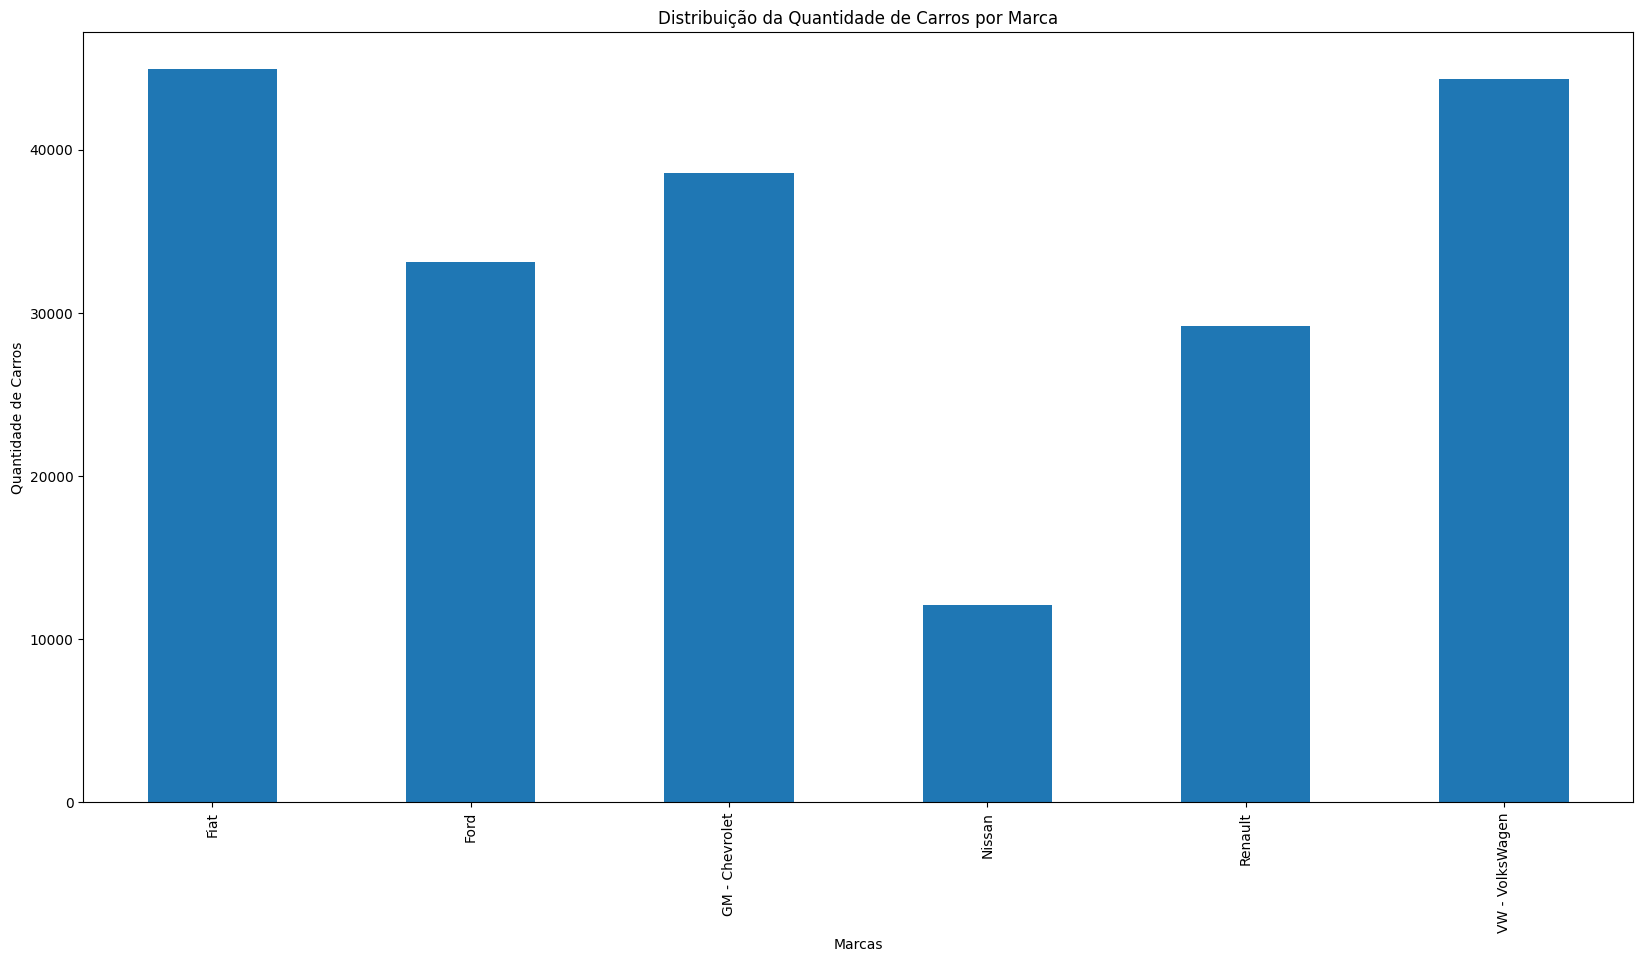

In [59]:
plt.figure(figsize=(20, 10))
df.groupby('brand')['fipe_code'].count().plot(kind='bar')
plt.xlabel('Marcas')
plt.ylabel('Quantidade de Carros')
plt.title('Distribuição da Quantidade de Carros por Marca')

plt.show()


## Gráfico de distribuição quantidade de carros por tipo de engrenagem

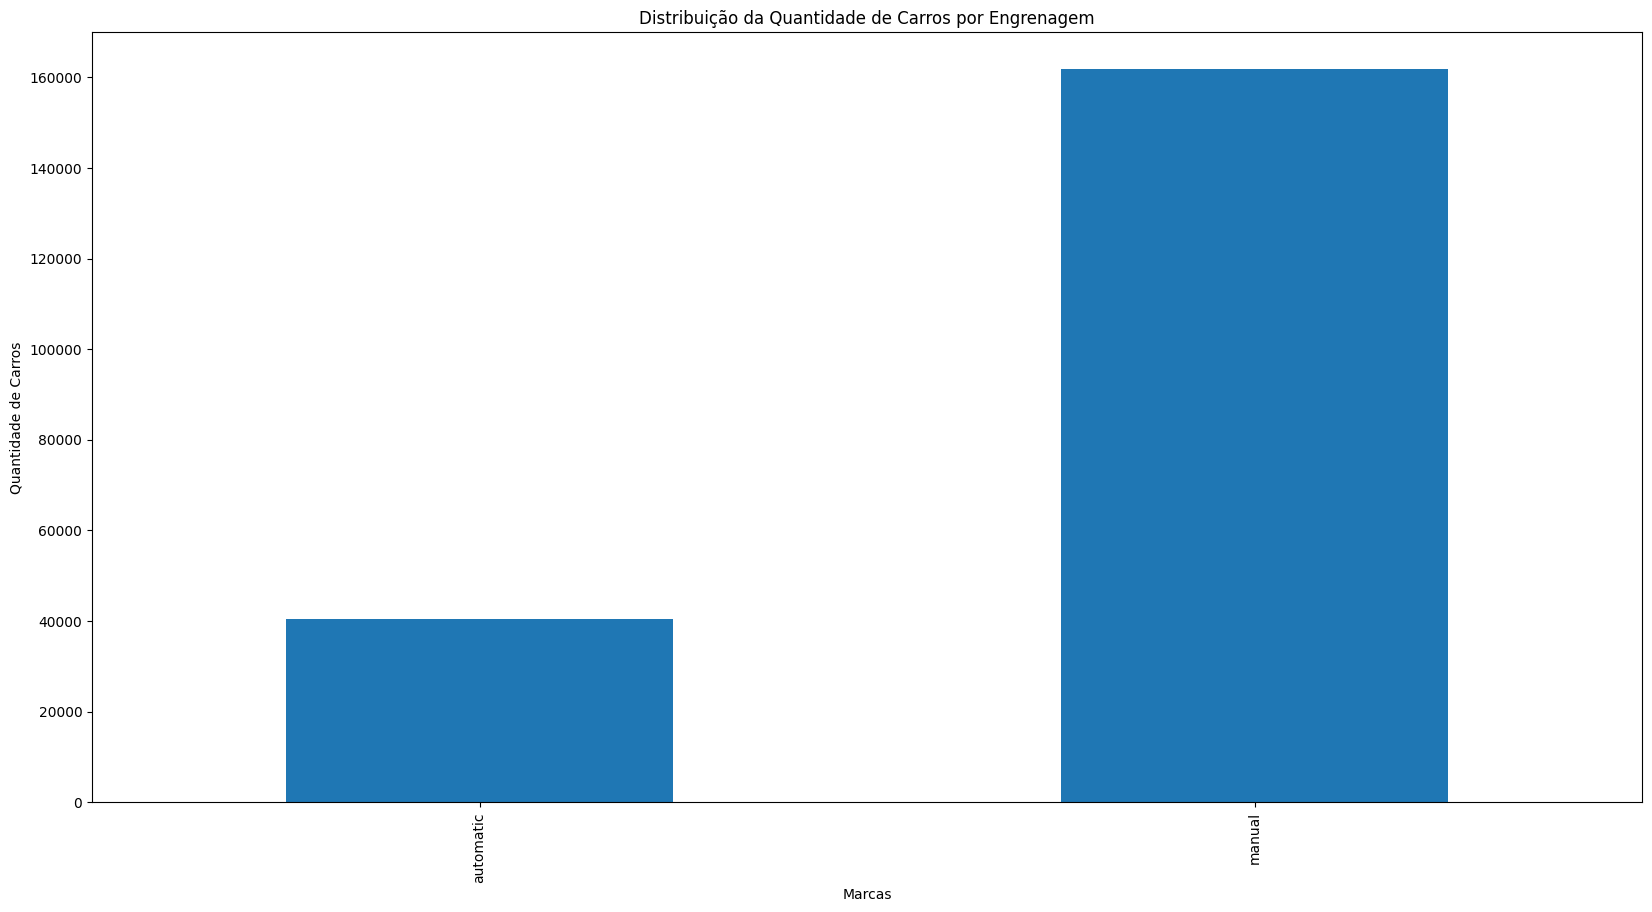

In [60]:
plt.figure(figsize=(20, 10))
df.groupby('gear')['fipe_code'].count().plot(kind='bar')
plt.xlabel('Marcas')
plt.ylabel('Quantidade de Carros')
plt.title('Distribuição da Quantidade de Carros por Engrenagem')

plt.show()

## Gráfico evolução média de preço dos carros ao longo de 2022

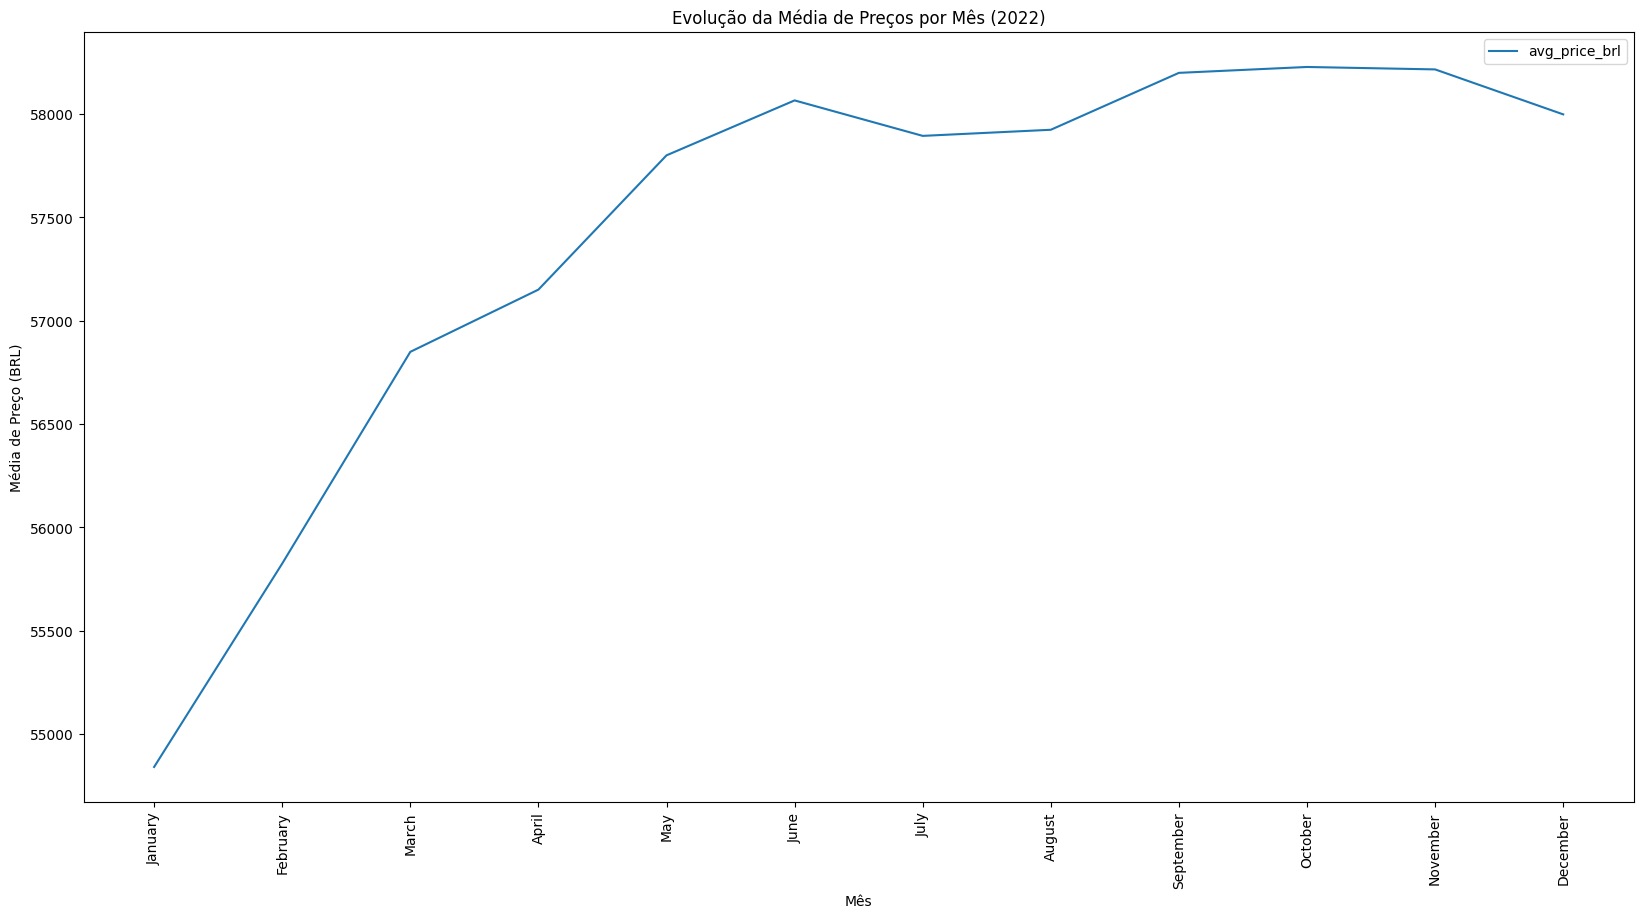

,month_of_reference,avg_price_brl
4,January,54840.270037
3,February,55824.519882
7,March,56848.951914
0,April,57150.037325
8,May,57799.763776
6,June,58065.611398
5,July,57893.997056
1,August,57923.544105
11,September,58198.936989
10,October,58227.410144


In [61]:
# filtra o ano de 2022 and agrupa por média mensal dos valores dos carros
df_from_year = df[df['year_of_reference'] == 2022]
df_avg_price_by_month = df_from_year.groupby('month_of_reference')['avg_price_brl'].mean().reset_index()

# ordenar os meses cronologicamente
df_avg_price_by_month = df_avg_price_by_month.sort_values('month_of_reference', key=lambda x: pd.to_datetime(x, format='%B'))

df_avg_price_by_month.plot(x='month_of_reference', y='avg_price_brl', kind='line', figsize=(20,10))
plt.xlabel('Mês')
plt.ylabel('Média de Preço (BRL)')
plt.title('Evolução da Média de Preços por Mês (2022)')

# imprimir todos os meses no gráfico (eixo x)
df_months = df_avg_price_by_month['month_of_reference']
plt.xticks(range(0,len(df_months.index)), df_months, rotation = 'vertical')

plt.show()

df_avg_price_by_month

## Gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

<Figure size 2000x1000 with 0 Axes>

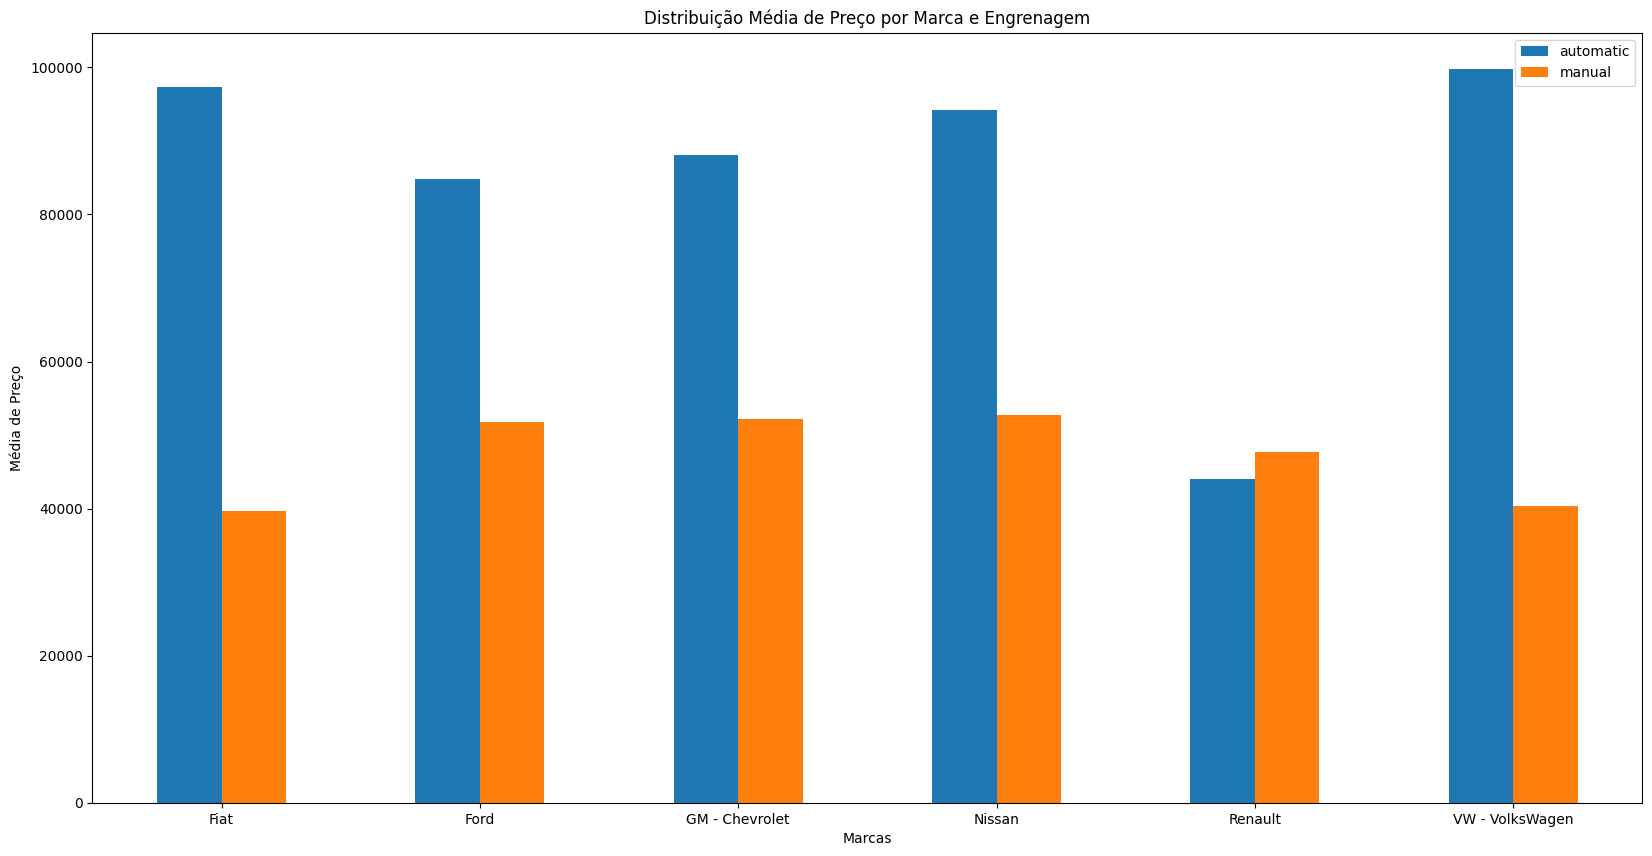

gear,brand,automatic,manual
0,Fiat,97396.801936,39694.442749
1,Ford,84769.106720,51784.851550
2,GM - Chevrolet,88156.919439,52119.422129
3,Nissan,94230.600604,52680.623596
4,Renault,44028.007521,47649.837635
5,VW - VolksWagen,99734.979181,40390.327451


In [62]:
df_pivoted_by_gear = df.groupby(['brand','gear'])['avg_price_brl'].mean().reset_index()

df_pivoted_by_gear = df_pivoted_by_gear.pivot_table(index='brand', columns='gear', values='avg_price_brl').reset_index()

plt.figure(figsize=(20, 10))
df_pivoted_by_gear.plot(x='brand', y=df_pivoted_by_gear.columns[1:], kind='bar', rot=0, figsize=(20,10))
plt.xlabel('Marcas')
plt.ylabel('Média de Preço')
plt.title('Distribuição Média de Preço por Marca e Engrenagem')
plt.legend()
plt.show()

df_pivoted_by_gear

## Gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

<Figure size 2000x1000 with 0 Axes>

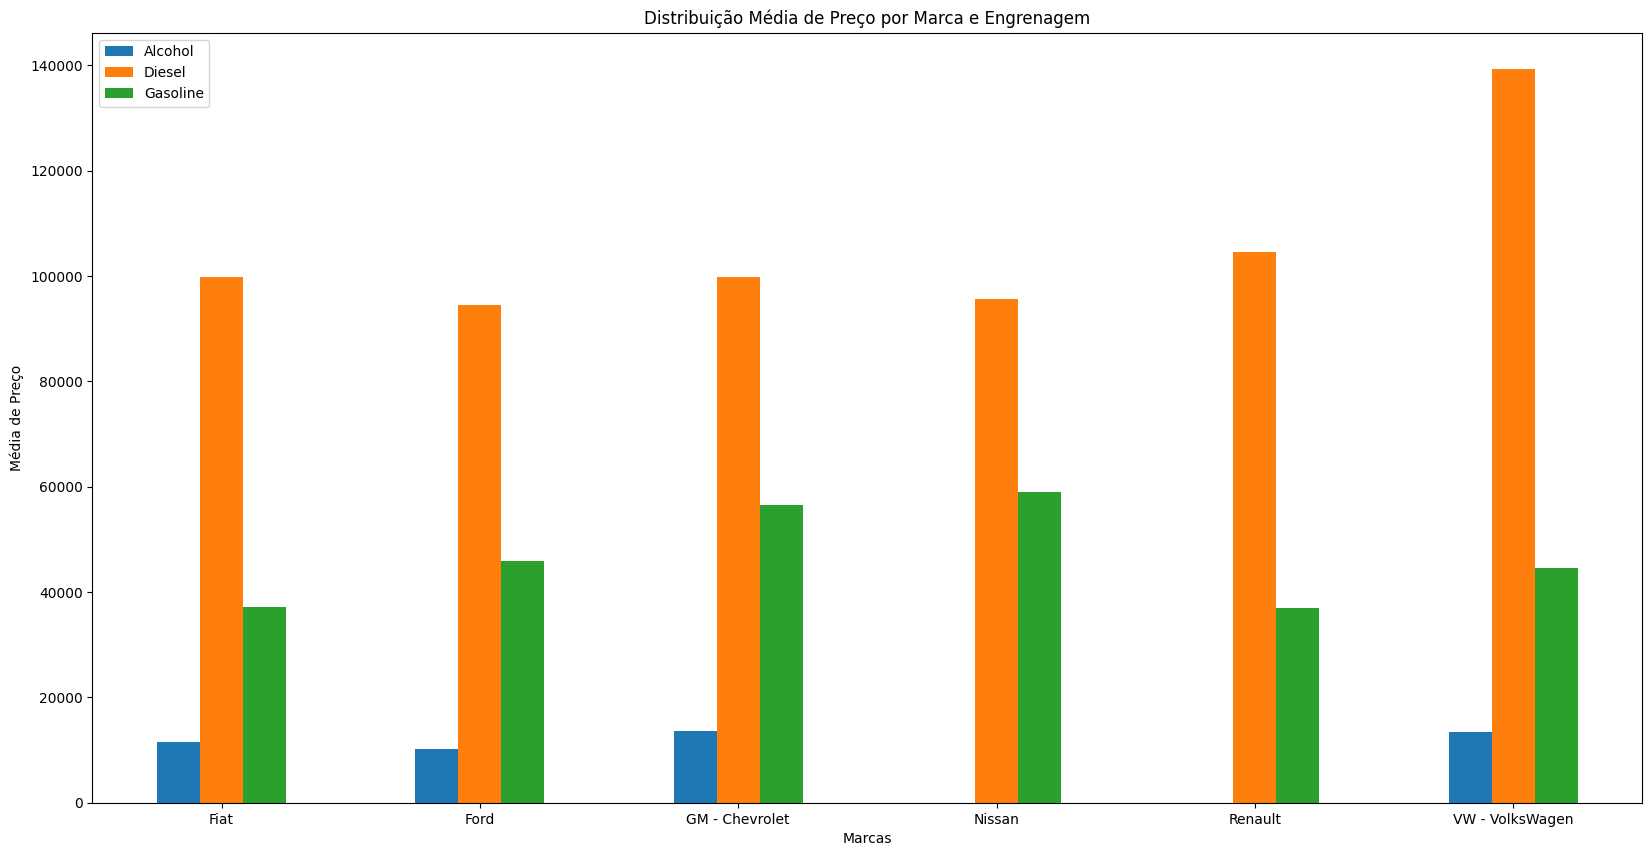

fuel,brand,Alcohol,Diesel,Gasoline
0,Fiat,11509.514419,99814.451429,37197.294483
1,Ford,10148.906667,94522.454826,45844.524969
2,GM - Chevrolet,13697.717687,99817.318601,56497.127255
3,Nissan,NaN,95534.071529,59043.288090
4,Renault,NaN,104529.925499,37059.317766
5,VW - VolksWagen,13392.684507,139216.276328,44653.797430


In [63]:
df_by_brand_and_fuel = df.groupby(['brand','fuel'])['avg_price_brl'].mean().reset_index()

df_pivoted_by_fuel = df_by_brand_and_fuel.pivot_table(index='brand', columns='fuel', values='avg_price_brl').reset_index()

plt.figure(figsize=(20, 10))
df_pivoted_by_fuel.plot(x='brand', y=df_pivoted_by_fuel.columns[1:], kind='bar', rot=0, figsize=(20,10))
plt.xlabel('Marcas')
plt.ylabel('Média de Preço')
plt.title('Distribuição Média de Preço por Marca e Engrenagem')
plt.legend()
plt.show()

df_pivoted_by_fuel

# Machine Learning

## Preparação Dados

### Transformar month_of_reference em numérico, conforme número do mês

In [64]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['month_of_reference_number'] = df['month_of_reference'].map(month_mapping)

df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_of_reference_number
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0,1
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0,1
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0,1
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0,1
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0,1


### Transformar brand, model, gear e fuel em numérico usando LabelEnconder

In [65]:
le = LabelEncoder()
df['brand_number'] = le.fit_transform(df['brand'])
df['model_number'] = le.fit_transform(df['model'])
df['gear_number'] = le.fit_transform(df['gear'])
df['fuel_number'] = le.fit_transform(df['fuel'])

df.head()


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_of_reference_number,brand_number,model_number,gear_number,fuel_number
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0,1,2,297,1,2
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0,1,2,297,1,2
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0,1,2,297,1,2
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0,1,2,297,1,0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0,1,2,260,1,2


### Transformar fipe_code em numérico, removendo caracters não numéricos, assim preservando o codigo fipe

In [66]:
df['fipe_code_numeric'] = df['fipe_code'].str.replace(r'\D', '', regex=True)
df['fipe_code_numeric'] = pd.to_numeric(df['fipe_code_numeric'], errors='coerce')

df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_of_reference_number,brand_number,model_number,gear_number,fuel_number,fipe_code_numeric
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0,1,2,297,1,2,40010
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0,1,2,297,1,2,40010
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0,1,2,297,1,2,40010
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0,1,2,297,1,0,40010
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0,1,2,260,1,2,40037


### Colunas de interesse para o modelo

In [67]:
df_full_to_model = df.drop(df.select_dtypes(exclude='number').columns.tolist(),axis = 1)
df_full_to_model.head()

,year_of_reference,year_model,avg_price_brl,month_of_reference_number,brand_number,model_number,gear_number,fuel_number,fipe_code_numeric
0,2021.0,2002.0,9162.0,1,2,297,1,2,40010
1,2021.0,2001.0,8832.0,1,2,297,1,2,40010
2,2021.0,2000.0,8388.0,1,2,297,1,2,40010
3,2021.0,2000.0,8453.0,1,2,297,1,0,40010
4,2021.0,2001.0,12525.0,1,2,260,1,2,40037


### Separar coluna target (avg_price_brl)

In [68]:
df_to_model = df_full_to_model.drop(['avg_price_brl'],axis = 1)
df_target = df_full_to_model['avg_price_brl']

### Particionar 75% / 25%

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(df_to_model, df_target, test_size = 0.25, random_state = 42)

## RandomForest

### Treinamento

In [70]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)
predict_values_rf = model_rf.predict(X_test)
predict_values_rf

array([ 40790.08,  11123.91,  28579.15, ...,  12640.45,  27036.94,
       177101.41])

### Importância Variáveis

In [71]:
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
year_model,0.349768
model_number,0.297954
fuel_number,0.176292
fipe_code_numeric,0.119007
gear_number,0.021689
brand_number,0.017015
year_of_reference,0.012716
month_of_reference_number,0.005558


### MSE

In [72]:
mse = mean_squared_error(Y_test, predict_values_rf)
mse

5691205.045478143

### MAE

In [73]:
mae = mean_absolute_error(Y_test, predict_values_rf)
mae

1060.9744990509143

### R²

In [74]:
r2_score(Y_test, predict_values_rf)

0.9978547458538981

## XGBoost

## Treinamento

In [75]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, Y_train)
predict_values_xgboost = model_xgboost.predict(X_test)
predict_values_xgboost

array([ 39516.832,  11798.201,  27723.314, ...,  10567.259,  25196.072,
       178493.36 ], dtype=float32)

## Importância Variáveis

In [76]:
feature_importances_xgboost = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances_xgboost

,importance
fuel_number,0.486602
year_model,0.170977
brand_number,0.138039
model_number,0.092122
gear_number,0.065926
fipe_code_numeric,0.027947
year_of_reference,0.013349
month_of_reference_number,0.005039


## MSE

In [77]:
mse_xgboost = mean_squared_error(Y_test, predict_values_xgboost)
mse_xgboost

34854617.46312717

## MAE

In [78]:
mae_xgboost = mean_absolute_error(Y_test, predict_values_xgboost)
mae_xgboost

3420.0102856553926

## R²

In [79]:
r2_score(Y_test, predict_values_xgboost)

0.9868618311893406